# UFLP

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#UFLP" data-toc-modified-id="UFLP-1.1">UFLP</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Random-Data-3.1">Random Data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-3.2">Road Network Data</a></span></li></ul></li></ul></div>

## Problem Description

### UFLP

The problem has only binary decision variables, which is suitable for verifying the performance analysis and comparison of binary optimization algorithms. In this problem, there are customers, suppliers and transportation costs, each customer should accept supplier orders. The problem has two costs, namely, facility construction cost and transportation cost. UFLP 's goal is to find an open facility set and an open facility solution for all customer services, so that **the total service cost and the total open facility cost are minimized.** 

*Parameters*:
* ***I*** : Collection of demand point locations
* ***h<sub>i</sub>*** : Number of customers at point i
* ***P*** : Total number of facilities
* ***d<sub>ij</sub>*** : Distance between point i and point j


*Decision variables*:
$$
X_i= \begin{cases}1, & \text { Build facilities at point } i \\ 0, & \text { else }\end{cases}\\
Y_{i j}= \begin{cases}1, & \text { Assign point } i \text { to point } j  \\ 0, & \text { else }\end{cases}
$$


###  Integer programming model:
\begin{array}{lll}
\min & \sum_{i, j \in I} h_i d_{i j} Y_{i j} & (1)\\
\text { s.t. } & \sum_{i \in I} X_i=P, & (2)\\
& Y_{i j} \leq X_j,  \forall i, j \in I, & (3) \\
& \sum_{j \in I} Y_{i j}=1,  \forall i \in I, & (4)\\
& X_i, Y_{i j} \in\{0,1\}, \forall i, j \in I.  & (5)
\end{array}

        

## Setup

In [1]:
import random
from itertools import product
import numpy as np
import osmnx as ox
import pandas as pd

from location.FLPModel import *

In [2]:
np.random.seed(0) # random seed
random.seed(0)
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

No parameters matching '_test' found
['CPLEX_CMD', 'GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD']


## Example

### Random Data

In [3]:
num_points = 20
num_located = 4  # P: number of located facility in the end
# np.random.seed(0)
demand = np.random.randint(10, size=num_points)  #d
cost = np.random.randint(10, size=num_points)  #c
num_people = np.random.randint(1, 2, size=num_points)  # h
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(random.random(), random.random()) for i in range(num_points)]
y, selected, selected_points, unselected_points  = UFLP(num_people=num_people,
                                                demand=demand,
                                                num_points=num_points,
                                                num_located=num_located,
                                                cartesian_prod=cartesian_prod,
                                                cost=cost,
                                                cover=points,
                                                solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected positions = [6, 9, 18]
Costs =  3.5119160779115792


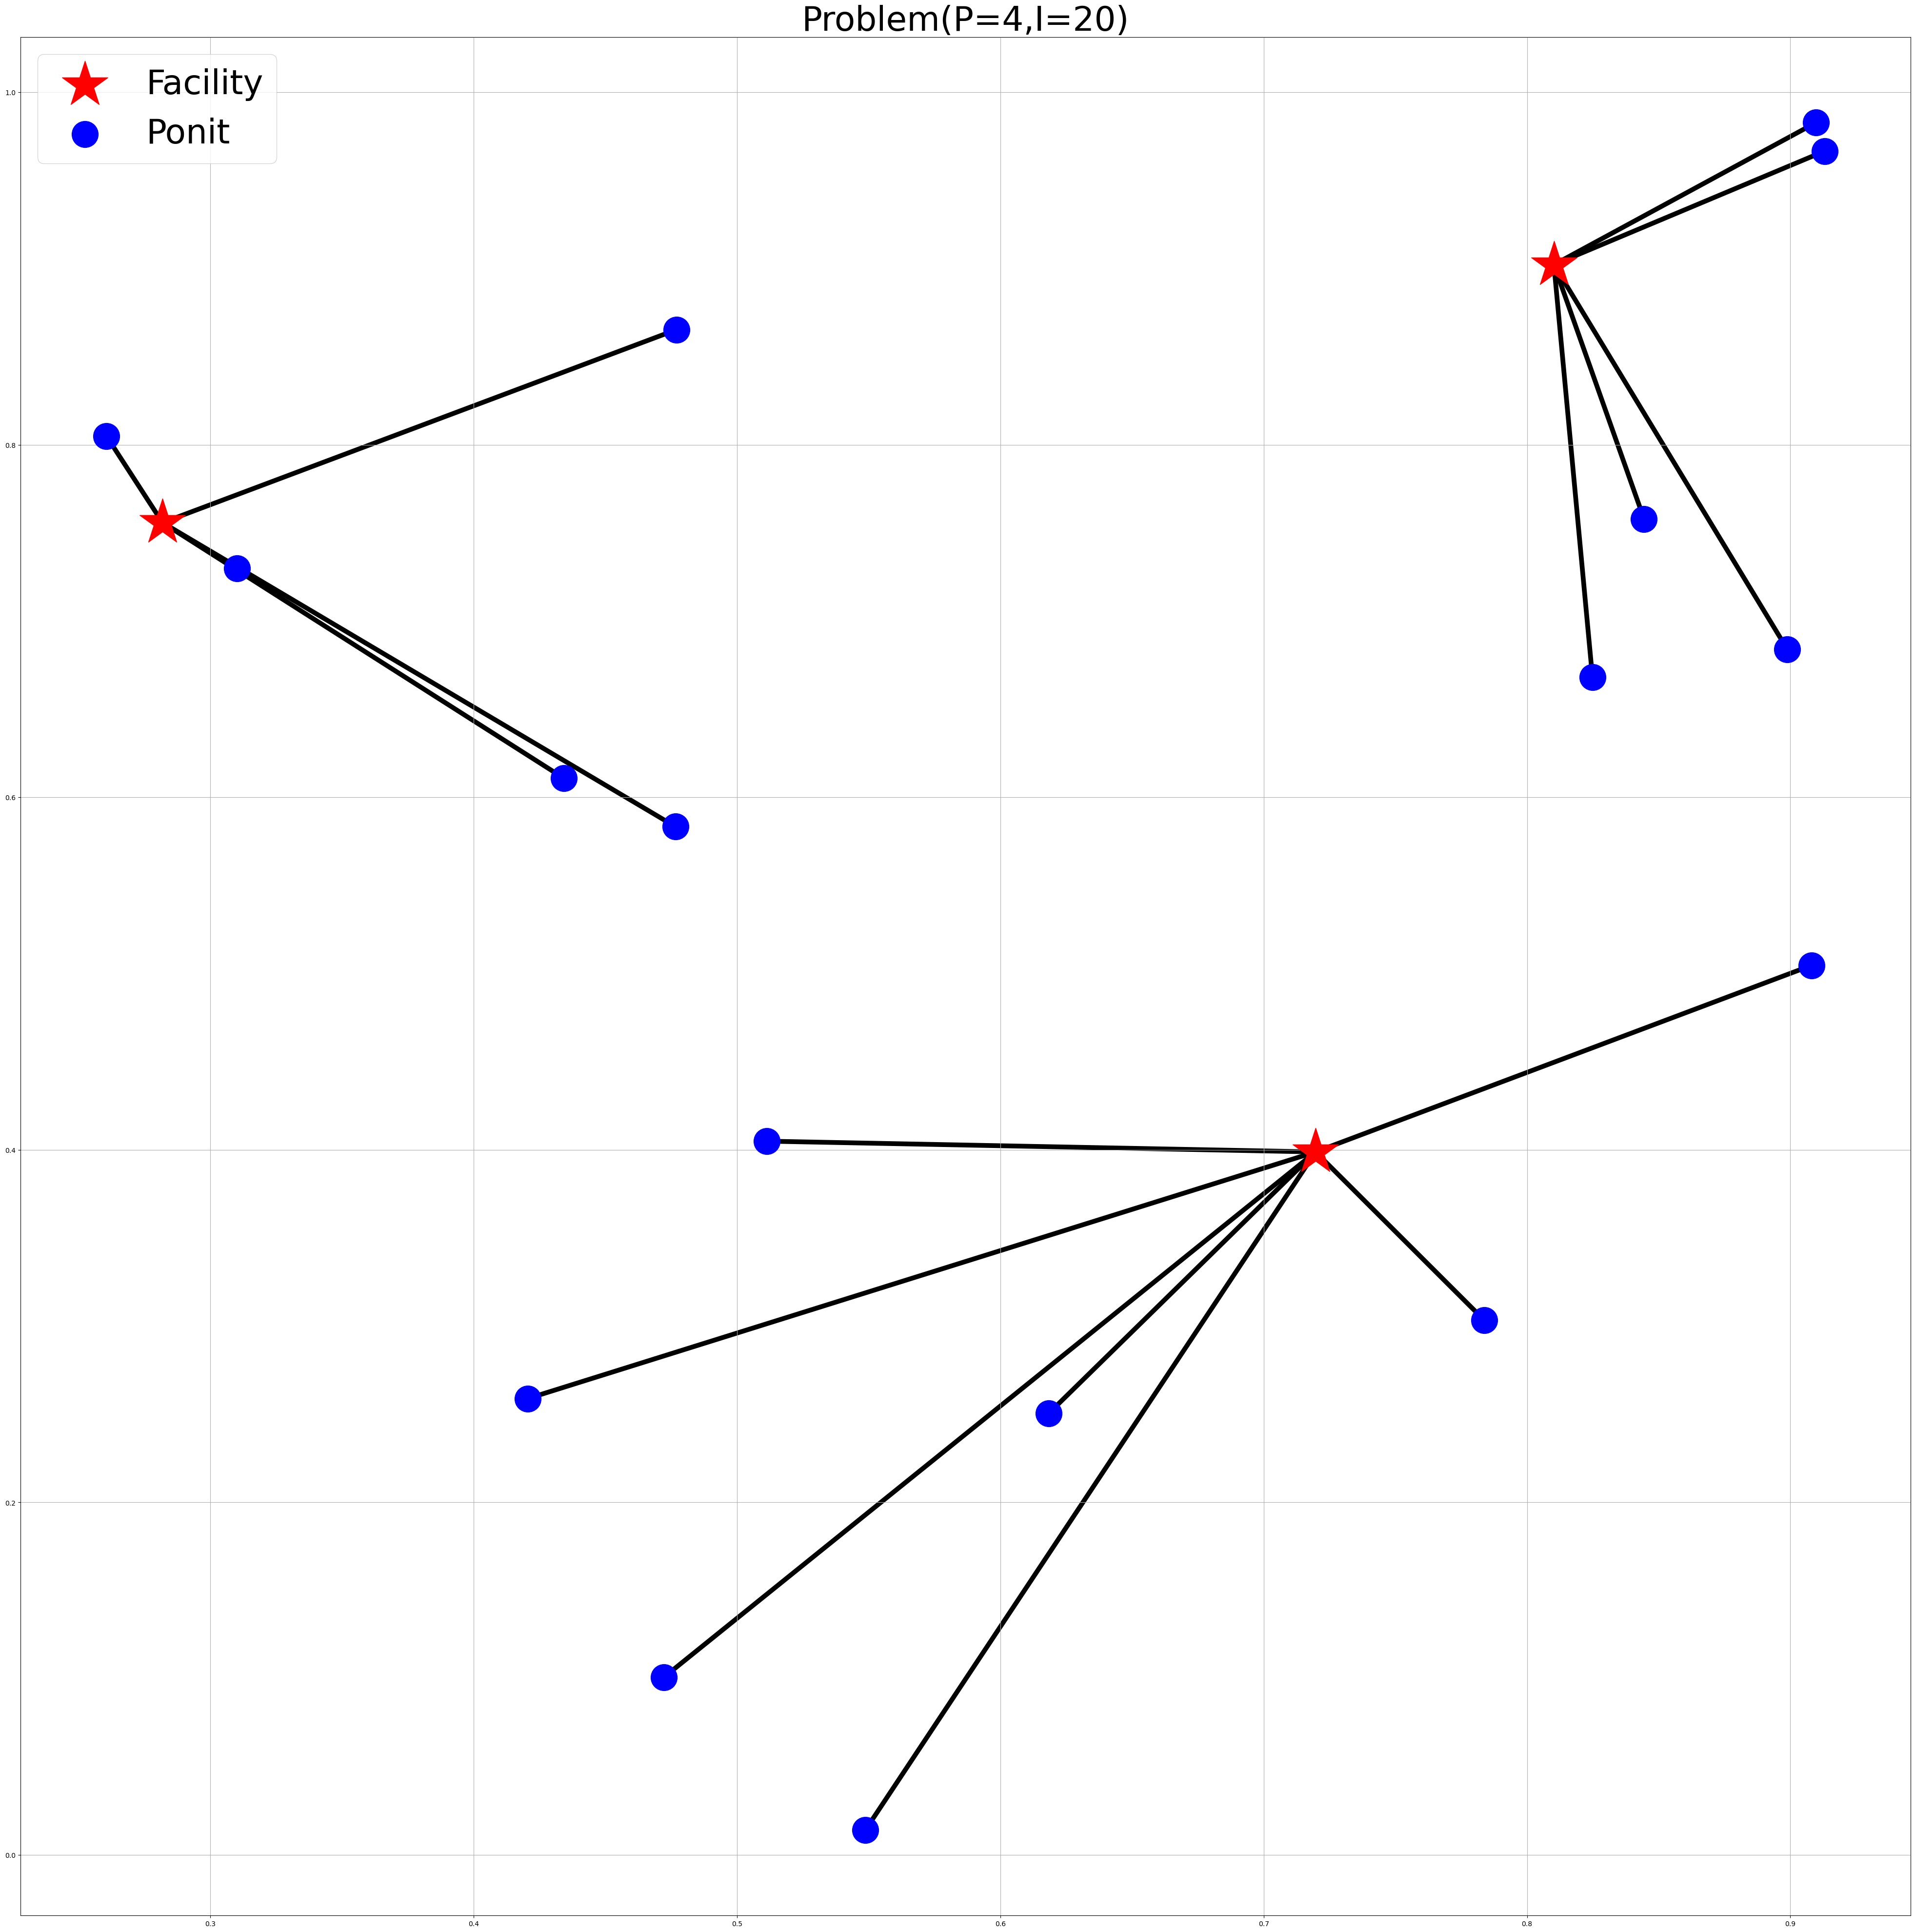

In [4]:
#Image representation
plt.figure(figsize=(50,50))
name = 'Problem(P=' + str(num_located) + ',I=' + str(num_points) + ')'
plt.title(name, fontsize = 50)
#Points
plt.scatter(*zip(*selected_points), c='Red', marker='*',s=5000,label = 'Facility',zorder=2)   
plt.scatter(*zip(*unselected_points), c='Blue', marker='o',s=1500, label = 'Ponit', zorder=3)
#Lines
for i in range(num_points):
    for j in range(num_points):
        if y[i][j].varValue == 1 :
            pts = [points[i], points[j]]
            plt.plot(*zip(*pts), c='Black', linewidth=7, zorder=1)


plt.grid(True)   
plt.legend(loc='best', fontsize = 50) 
plt.show()

### Road Network Data

In [5]:
df = pd.read_csv('../data/北京POI裁剪.csv',encoding='gbk')
df = df.query('adname=="东城区" | adname=="西城区" | adname=="朝阳区" | adname=="海淀区"').reset_index(drop=True)
data = df[['long', 'lat']]
num_points = df.shape[0]
num_located = 10
np.random.seed(0)
num_people = np.random.randint(1,2, size=num_points)
demand = np.random.randint(20, size=num_points)  #d
cost = np.random.randint(20, size=num_points)  #c
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(data['long'][i], data['lat'][i]) for i in range(num_points)]

In [6]:
y, selected, selected_points, unselected_points  = UFLP(num_people=num_people,
                                                demand=demand,
                                                num_points=num_points,
                                                num_located=num_located,
                                                cartesian_prod=cartesian_prod,
                                                cost=cost,
                                                cover=points,
                                                solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected positions = [10, 11, 33, 47, 72, 108]
Costs =  4.9287408379333675


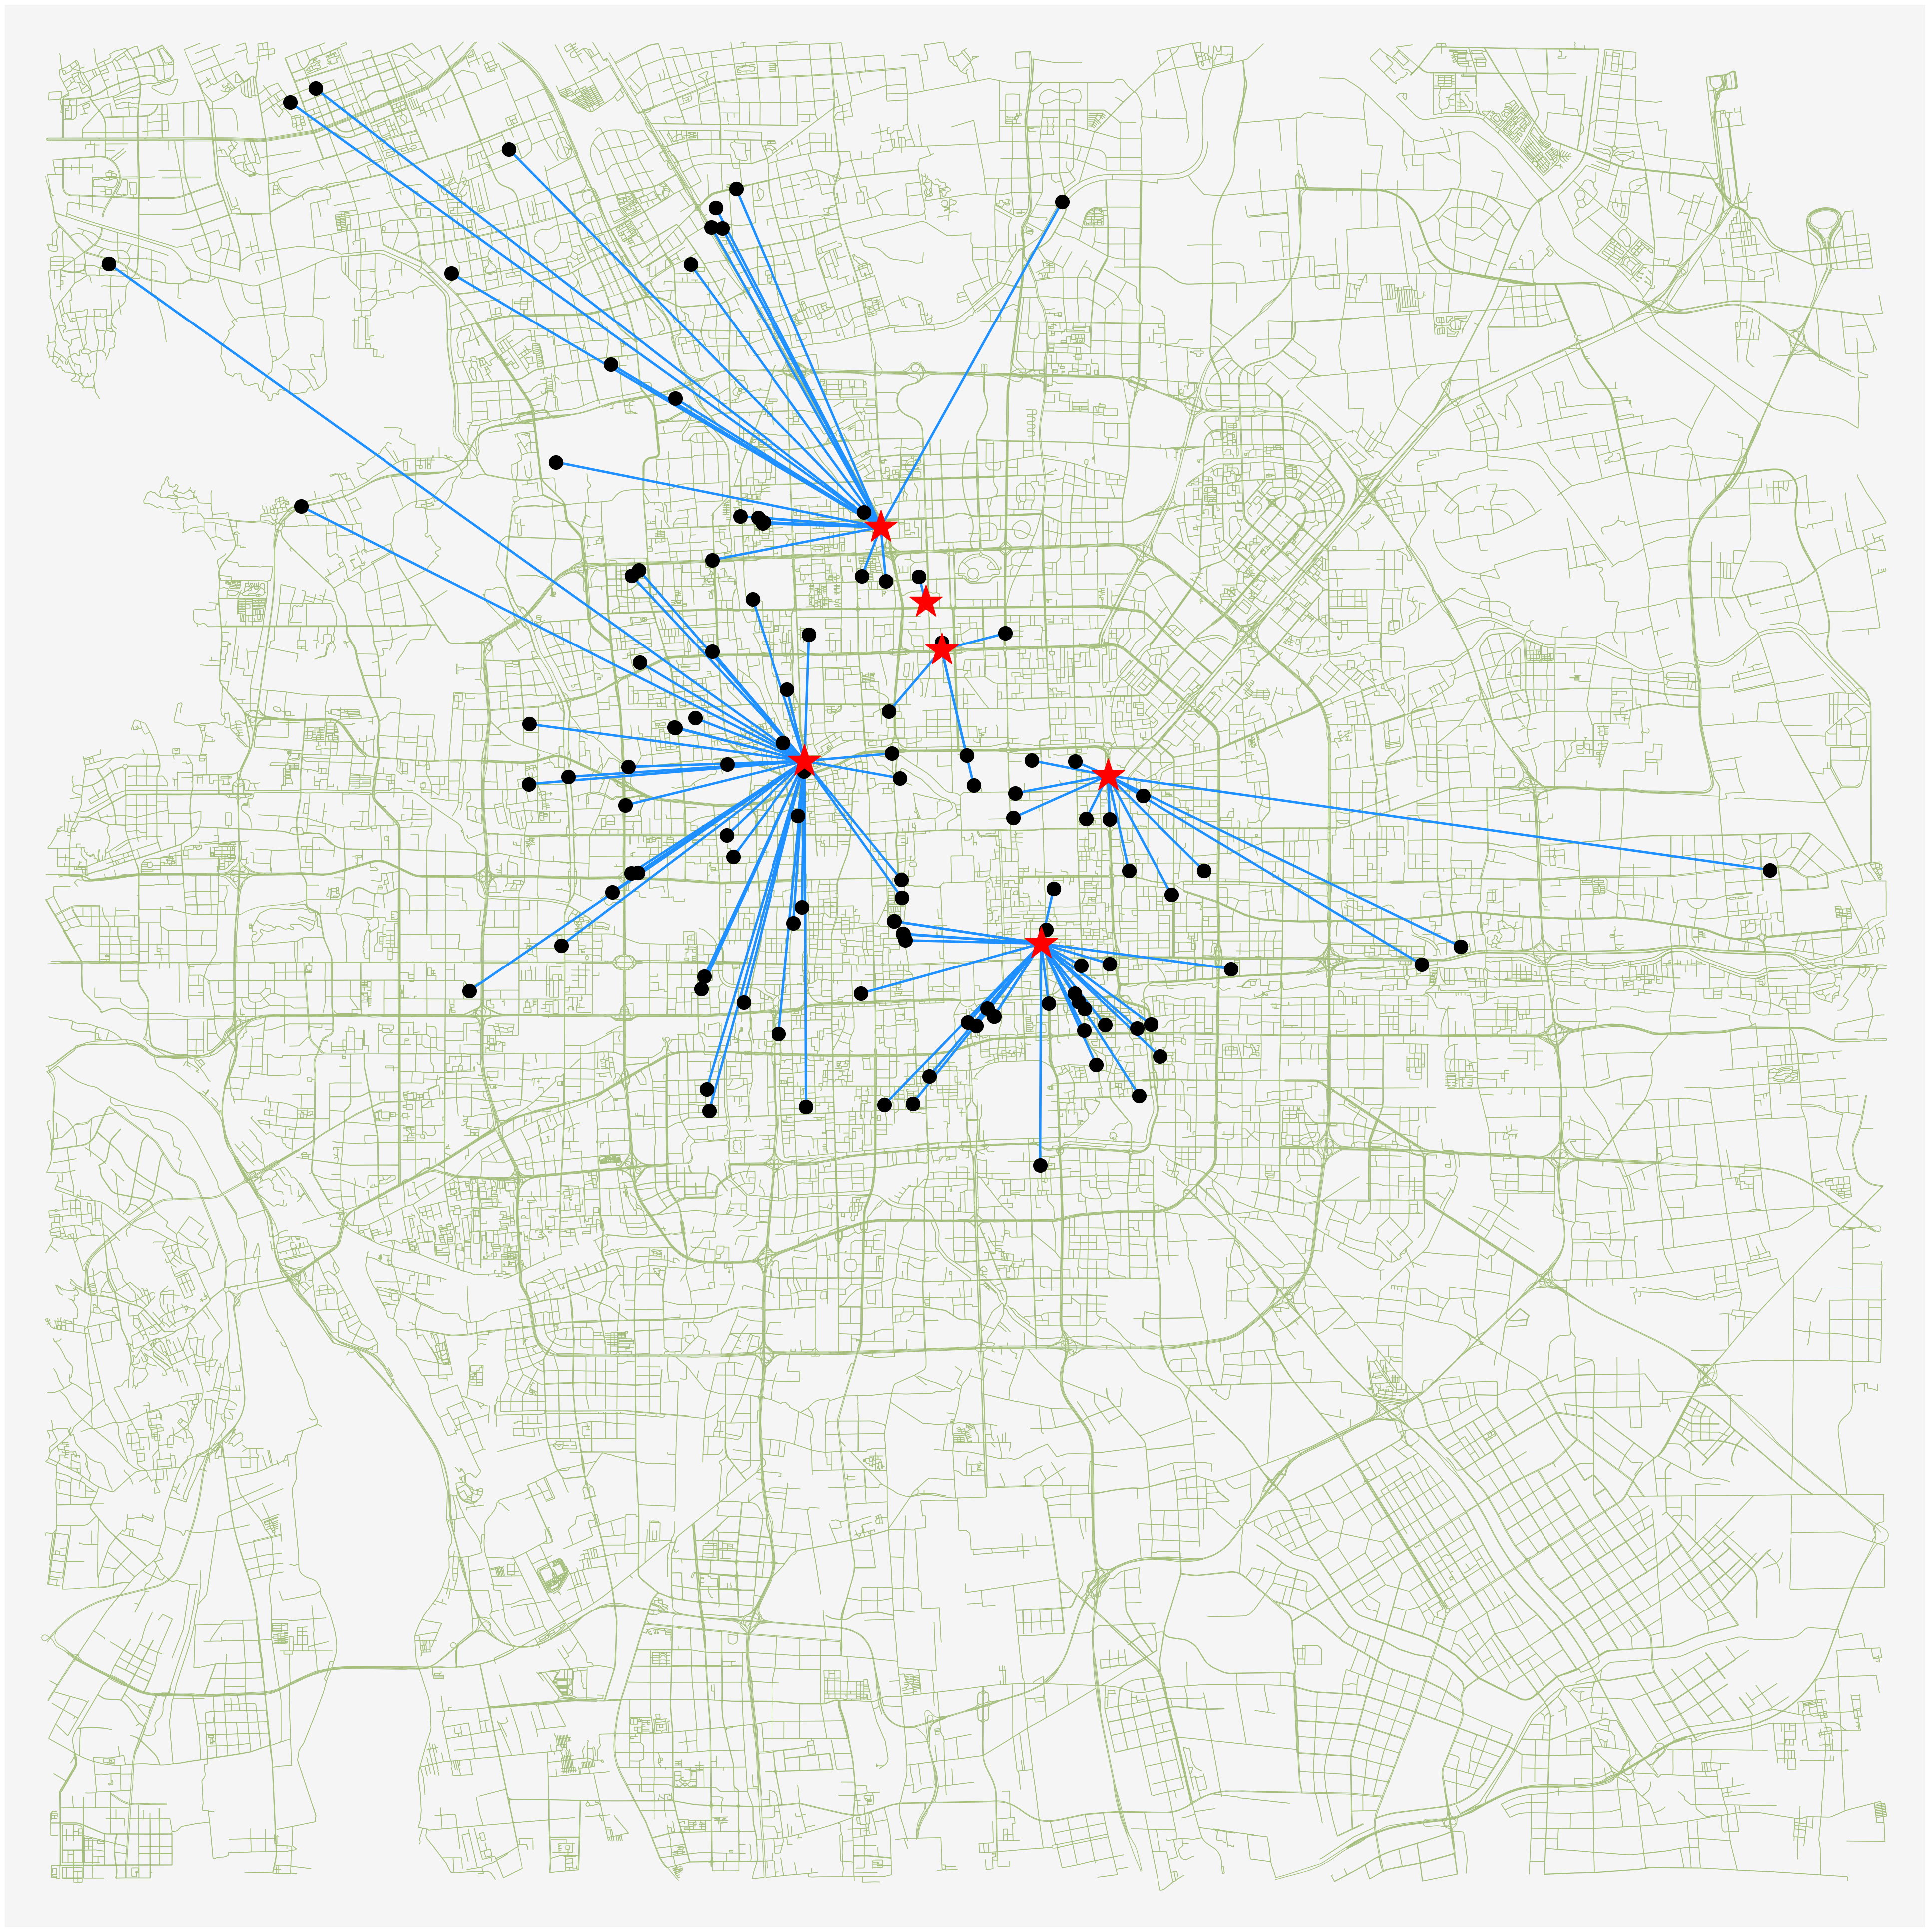

In [7]:
G = ox.load_graphml('..\data\Beijing.graphml')
ox.plot_graph(G, figsize=(50,50),bgcolor="#F5F5F5",node_size=0,edge_color = "#A4BE7B", show=False, close=False)
for j in range(num_points):
    if j in selected:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c='red',marker='*',markersize=50, zorder=3)
    else:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c="black",marker='o',markersize=20, zorder=2)
#Lines
for i in range(num_points):
    for j in range(num_points):
        if y[i][j].varValue == 1 :
            pts = [points[i], points[j]]
            plt.plot(*zip(*pts), c='#1E90FF', linewidth=3.5, zorder=1)